In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Clustering
- Unsupervised Machine Learning
- Discover things about unlabeled data
- Why?
    - Explore
    - Labeling
    - Features for supervised learning
    

In [290]:
iris = sns.load_dataset('iris')

# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [291]:
train_scaled

,sepal_length,sepal_width,petal_length,petal_width,species
41,-1.608304,-1.741994,-1.333104,-1.141286,setosa
142,-0.040855,-0.847906,0.796712,1.005974,virginica
82,-0.040855,-0.847906,0.124139,0.066547,versicolor
127,0.320864,-0.177340,0.684617,0.871770,virginica
28,-0.764293,0.716748,-1.277056,-1.275490,setosa
...,...,...,...,...,...
29,-1.367158,0.269704,-1.164960,-1.275490,setosa
52,1.285447,0.046182,0.684617,0.469159,versicolor
1,-1.126012,-0.177340,-1.277056,-1.275490,setosa
57,-1.126012,-1.518472,-0.212148,-0.201860,versicolor


**Clustering with 2 features and 4 clusters**

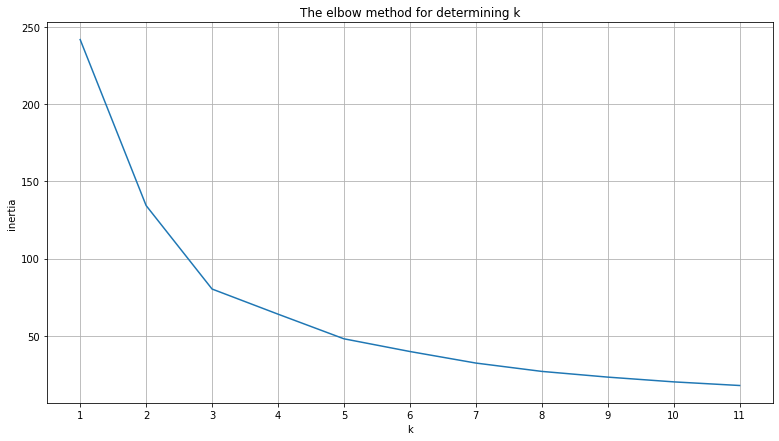

In [292]:
# selecting the features to use to create clusters

x = train_scaled[['sepal_length', 'sepal_width']]


# lets check how many clusters will be optimal
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()


In [293]:
# creating the object
kmeans = KMeans(n_clusters = 4)

# fitting the object
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [294]:
# getting the dataframe of the cluster centers
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)


,sepal_length,sepal_width
0,1.285447,0.130003
1,-0.912906,0.883091
2,-0.557597,-1.662165
3,0.185219,-0.589459


In [295]:
# lets see which clusters the kmeans object labels the observations into

kmeans.labels_

array([2, 3, 3, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2,
       1, 1, 1, 1, 3, 1, 3, 3, 2, 1, 1, 0, 1, 1, 1, 1, 3, 1, 2, 3, 0, 0,
       3, 3, 1, 3, 3, 0, 2, 3, 2, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0,
       1, 3, 1, 1, 1, 0, 0, 3, 0, 3, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 3, 3,
       3, 3, 0, 1, 3, 0, 1, 3, 0, 3, 1, 1, 3, 2, 1, 3, 0, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 0, 0, 1, 0, 1, 2, 1], dtype=int32)

In [296]:
# lets create a column that holds the cluster labels for each observation

train['clusters'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [297]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
41,4.5,2.3,1.3,0.3,setosa,2
142,5.8,2.7,5.1,1.9,virginica,3
82,5.8,2.7,3.9,1.2,versicolor,3
127,6.1,3.0,4.9,1.8,virginica,3
28,5.2,3.4,1.4,0.2,setosa,1
...,...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa,1
52,6.9,3.1,4.9,1.5,versicolor,0
1,4.9,3.0,1.4,0.2,setosa,1
57,4.9,2.4,3.3,1.0,versicolor,2


In [298]:
# lets group by our data on clusters and get mean to see if we can spot obvious differences

train.groupby('clusters').mean()

,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,6.900000,3.137500,5.531250,1.915625
1,5.076744,3.474419,1.544186,0.286047
2,5.371429,2.335714,3.700000,1.135714
3,5.987500,2.815625,4.684375,1.553125


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

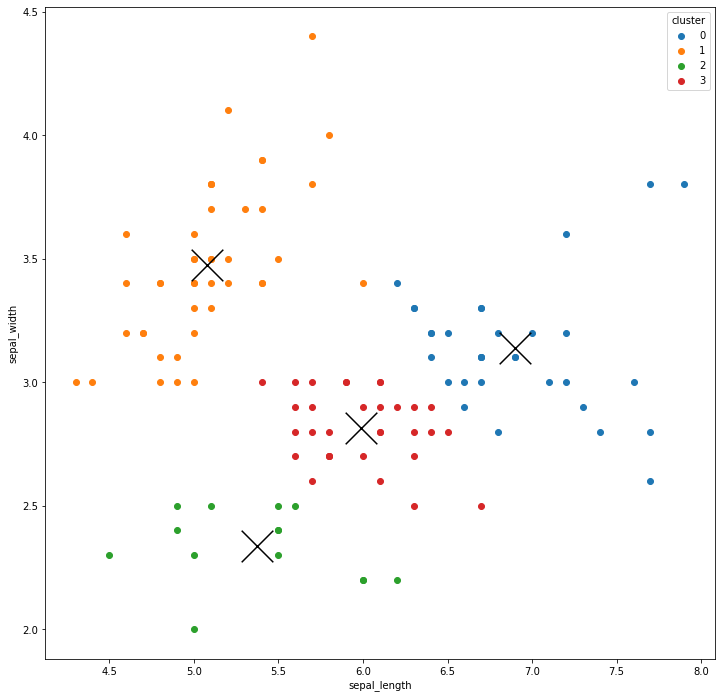

In [299]:
# lets plot with clusters, and centroids

fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.sepal_length, subset.sepal_width, label = cluster)
ax.legend(title = 'cluster')
ax.set(ylabel = 'sepal width', xlabel = 'sepal length')

train.groupby('clusters').mean().plot.scatter(y = 'sepal_width', x= 'sepal_length', marker = 'x',
                                              s = 1000, ax = ax, c = 'black')

**Clustering with 3 features and 3 clusters**

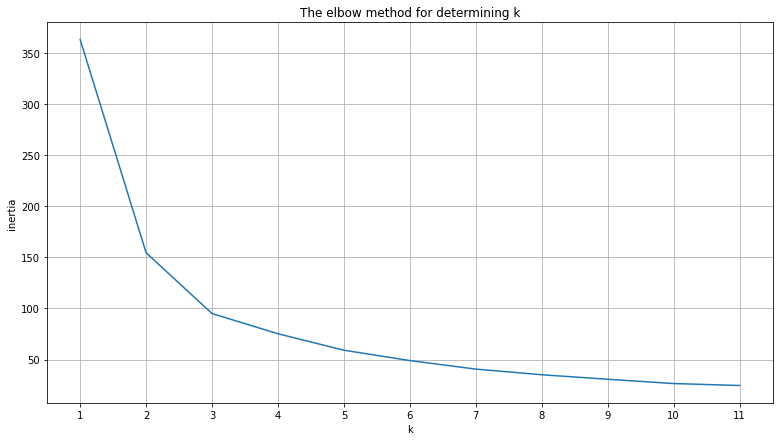

In [300]:
# selecting features

x = train_scaled[['sepal_length', 'petal_length', 'sepal_width']]


# lets check how many clusters will be optimal
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()



In [301]:
# creating the kmeans object

kmeans = KMeans(n_clusters = 3)

# fitting the object
kmeans.fit(x)

# creating a dataframe of the cluster centers
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)

,sepal_length,petal_length,sepal_width
0,1.129585,0.973058,0.013472
1,-0.939411,-1.235687,0.887051
2,-0.180466,0.315881,-0.994960


In [302]:
train['clusters'] = kmeans.labels_
train.groupby('clusters').mean()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width
clusters,,,,
0,6.770732,3.085366,5.414634,1.856098
1,5.054762,3.476190,1.473810,0.254762
2,5.684211,2.634211,4.242105,1.378947


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

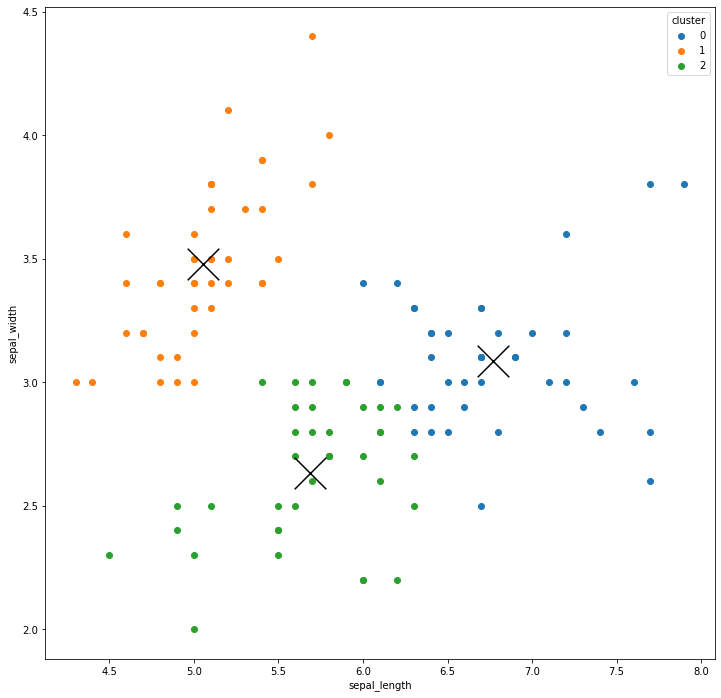

In [303]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.sepal_length, subset.sepal_width, label = cluster)
ax.legend(title = 'cluster')
ax.set(ylabel = 'sepal width', xlabel = 'sepal length')

train.groupby('clusters').mean().plot.scatter(y = 'sepal_width', x= 'sepal_length', marker = 'x',
                                              s = 1000, ax = ax, c = 'black')

**Clustering with mall data**

In [304]:
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password
import os
import wrangle_mall

In [305]:
# getting the data

df = wrangle_mall.get_mall_data()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [306]:
# prep creates dummy variables for cat variables

df = wrangle_mall.prep_mall(df)

# splitting the data
train, test, validate = wrangle_mall.split_data(df)
train.shape, test.shape, validate.shape

((144, 5), (30, 5), (26, 5))

In [307]:
# scaling the data
train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_data(train, test, validate, 
                                                                    scaler = MinMaxScaler())

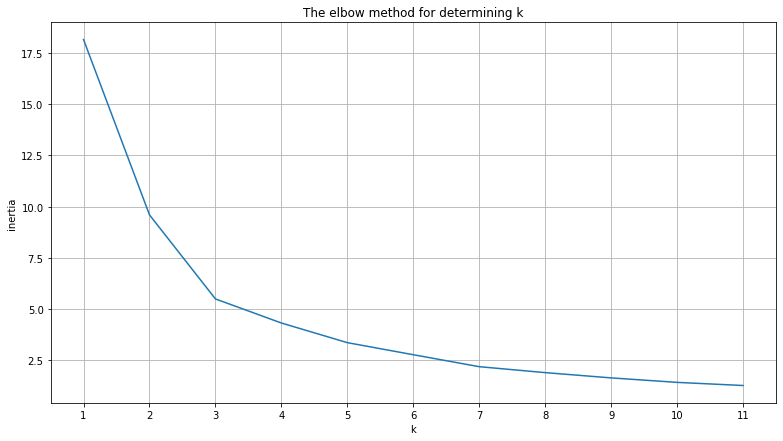

In [308]:
x = train_scaled[['age', 'annual_income']]


# lets check how many clusters will be optimal
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [309]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [310]:
pd.DataFrame(kmeans.cluster_centers_ ,columns = x.columns)
train['clusters'] = kmeans.labels_
train



,customer_id,age,annual_income,spending_score,Male,clusters
107,108,54,63,46,1,2
40,41,65,38,35,0,3
167,168,33,86,95,0,0
22,23,46,25,5,0,2
187,188,28,101,68,1,0
...,...,...,...,...,...,...
100,101,23,62,41,0,1
136,137,44,73,7,0,2
16,17,35,21,35,0,1
131,132,39,71,75,1,2


<AxesSubplot:xlabel='age', ylabel='annual_income'>

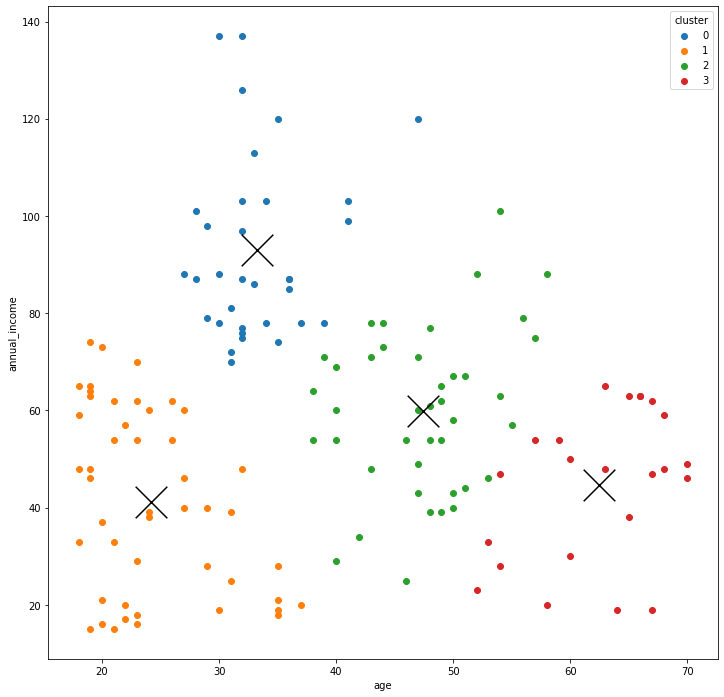

In [311]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.age, subset.annual_income, label = cluster)
ax.legend(title = 'cluster')
ax.set(ylabel = 'annual income', xlabel = 'age')

train.groupby('clusters').mean().plot.scatter(y = 'annual_income', x= 'age', marker = 'x',
                                              s = 1000, ax = ax, c = 'black')

**clustering mall data with three features and 3 clusters**

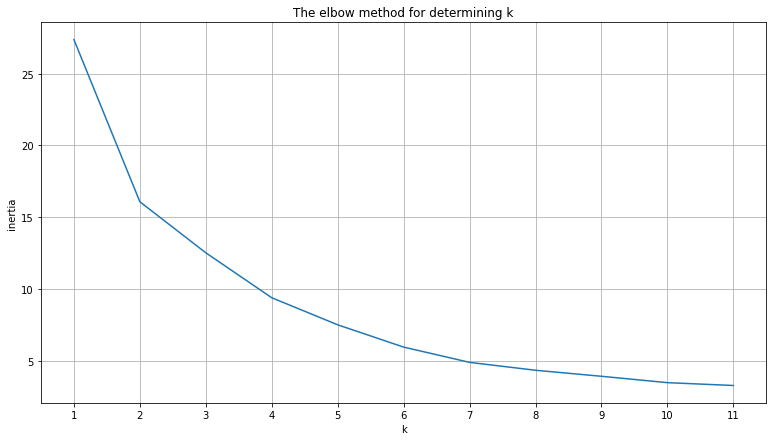

In [312]:
x = train_scaled[['age', 'annual_income', 'spending_score']]

# lets check how many clusters will be optimal
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [313]:
# creating fitting and predicting with k means object

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

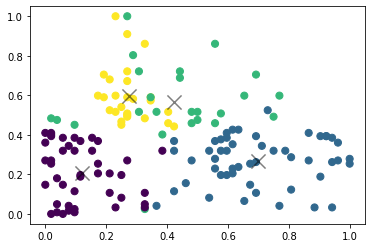

In [314]:
# ploting the centroids differently

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker = 'x');

In [315]:
pd.DataFrame(kmeans.cluster_centers_ ,columns = x.columns)
train['clusters'] = kmeans.labels_
train

,customer_id,age,annual_income,spending_score,Male,clusters
107,108,54,63,46,1,1
40,41,65,38,35,0,1
167,168,33,86,95,0,3
22,23,46,25,5,0,1
187,188,28,101,68,1,3
...,...,...,...,...,...,...
100,101,23,62,41,0,0
136,137,44,73,7,0,2
16,17,35,21,35,0,0
131,132,39,71,75,1,3


<AxesSubplot:xlabel='age', ylabel='spending_score'>

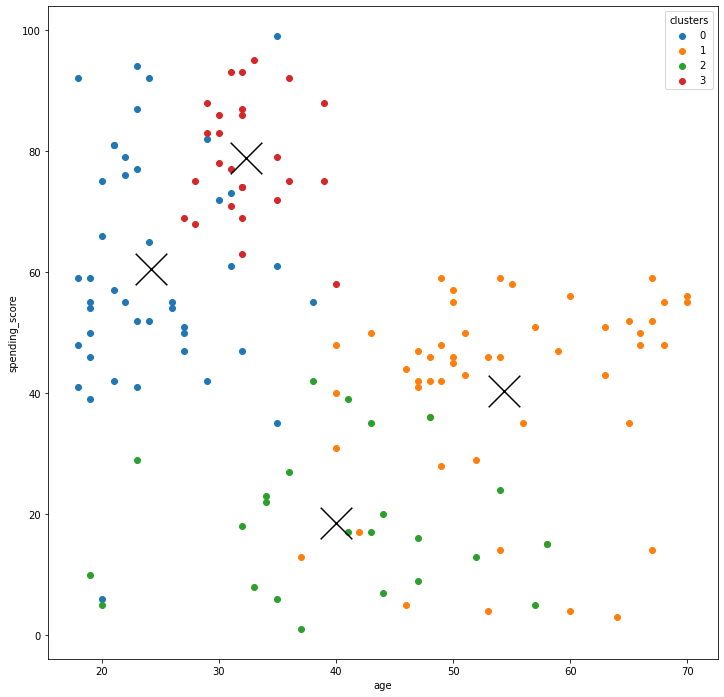

In [316]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('clusters'):
    ax.scatter(subset.age, subset.spending_score, label = cluster)
ax.legend(title = 'clusters')
ax.set(xlabel = 'age', ylabel = 'spending score')
train.groupby('clusters').mean().plot.scatter(x = 'age', y = 'spending_score', ax = ax, marker = 'x', s = 1000, c = 'black')

**Clustering without scaling**

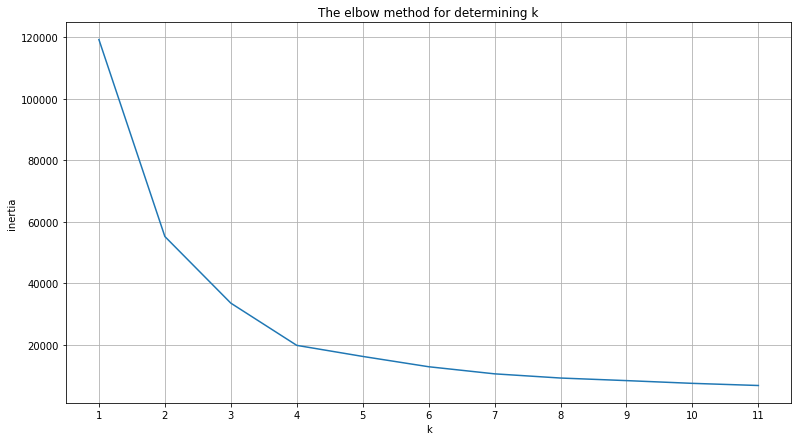

In [317]:
x = train[['age', 'spending_score']]
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

In [318]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans= kmeans.predict(x)


In [319]:
pd.DataFrame(kmeans.cluster_centers_, columns = x.columns)
train['unscaled_clusters'] = kmeans.labels_

<AxesSubplot:xlabel='age', ylabel='spending_score'>

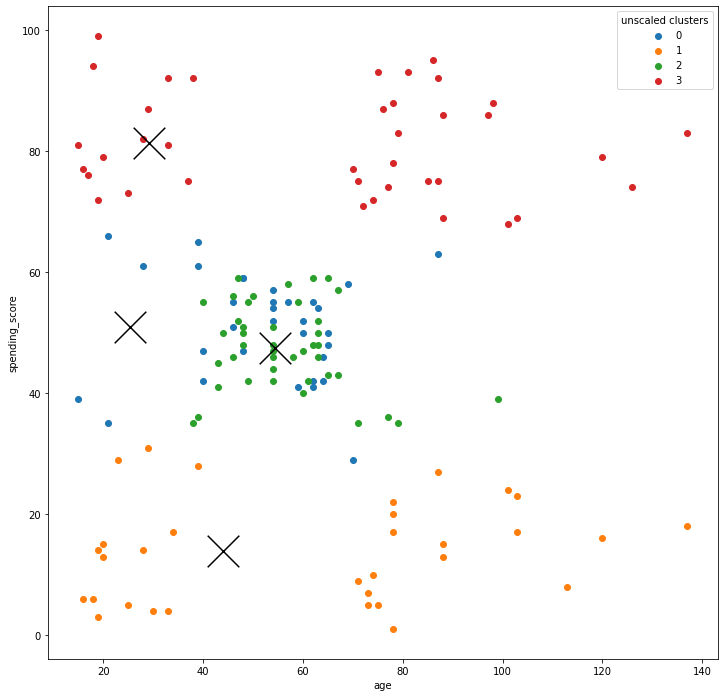

In [320]:
fig, ax = plt.subplots(figsize = (12,12))
for cluster, subset in train.groupby('unscaled_clusters'):
    ax.scatter(subset.annual_income, subset.spending_score, label = cluster)
ax.legend(title = 'unscaled clusters')
ax.set(xlabel = 'age', ylabel = 'spending score')
train.groupby('unscaled_clusters').mean().plot.scatter(x = 'age', y = 'spending_score', ax = ax, marker = 'x',
                                                      s = 1000, c = 'black')

In [326]:
train.groupby('clusters').describe().T

clusters                          0           1           2           3
customer_id       count   43.000000   51.000000   24.000000   26.000000
                  mean    54.279070   70.039216  153.000000  164.192308
                  std     37.440318   34.510845   40.415236   22.863104
                  min      1.000000    9.000000    7.000000  123.000000
                  25%     21.000000   44.000000  136.500000  145.000000
                  50%     48.000000   71.000000  152.000000  167.000000
                  75%     86.500000   95.500000  185.500000  181.000000
                  max    116.000000  161.000000  199.000000  200.000000
age               count   43.000000   51.000000   24.000000   26.000000
                  mean    24.209302   54.333333   40.000000   32.346154
                  std      5.422871    8.985915   10.500518    3.463435
                  min     18.000000   37.000000   19.000000   27.000000
                  25%     20.000000   48.000000   34.000000   30.000000
                  50%     23.000000   53.000000   41.000000   32.000000
                  75%     27.000000   63.000000   47.000000   34.500000
                  max     38.000000   70.000000   58.000000   40.000000
annual_income     count   43.000000   51.000000   24.000000   26.000000
                  mean    40.395349   47.882353   84.041667   88.076923
                  std     17.226972   14.727725   22.964016   17.492680
                  min     15.000000   19.000000   18.000000   69.000000
                  25%     23.000000   39.000000   73.000000   76.250000
                  50%     40.000000   49.000000   78.000000   85.500000
                  75%     55.500000   60.000000   99.500000   94.750000
                  max     65.000000   79.000000  137.000000  137.000000
spending_score    count   43.000000   51.000000   24.000000   26.000000
                  mean    60.581395   40.392157   18.500000   78.884615
                  std     18.856895   16.191453   11.579592    9.811532
                  min      6.000000    3.000000    1.000000   58.000000
                  25%     49.000000   35.000000    8.750000   72.500000
                  50%     55.000000   46.000000   17.000000   77.500000
                  75%     75.500000   51.000000   24.750000   86.750000
                  max     99.000000   59.000000   42.000000   95.000000
Male              count   43.000000   51.000000   24.000000   26.000000
                  mean     0.418605    0.411765    0.416667    0.384615
                  std      0.499169    0.497050    0.503610    0.496139
                  min      0.000000    0.000000    0.000000    0.000000
                  25%      0.000000    0.000000    0.000000    0.000000
                  50%      0.000000    0.000000    0.000000    0.000000
                  75%      1.000000    1.000000    1.000000    1.000000
                  max      1.000000    1.000000    1.000000    1.000000
unscaled_clusters count   43.000000   51.000000   24.000000   26.000000
                  mean     1.000000    1.764706    1.041667    2.769231
                  std      1.414214    0.428403    0.464306    0.815239
                  min      0.000000    1.000000    0.000000    0.000000
                  25%      0.000000    2.000000    1.000000    3.000000
                  50%      0.000000    2.000000    1.000000    3.000000
                  75%      3.000000    2.000000    1.000000    3.000000
                  max      3.000000    2.000000    2.000000    3.000000

**Takeaways:**
- Customers who make the most and who make the least are the two biggiest groups in terms of spending scores.
- The top two groups in terms of spending scores are the youngest group

**Its always a good idea to scale the data before clustering because unscaled values of different scale
will greatly influence the clustering process**

**For example, if two features like weight in lbs and height in meters were to use create a cluster
the weight will significantly influence the process because it will hold greater value compared to
height in meters**